# Identification of Lyapunov function using SOS programming
$$
\begin{aligned}
V(x) \in SOS \\
-\langle \nabla V(x), f(x) \rangle \in SOS
\end{aligned}
$$

In [1]:
function plot_traj(x0,y0)
f = @(t,x) [-x(1) + (1+x(1))*x(2); -(1+x(1))*x(1)]; % vector field
[ts,ys] = ode45(f,[0,200],[x0;y0]);
figure;
plot(ys(:,1),ys(:,2),'LineWidth',2)
xlabel('x(t)', 'FontSize', 12);
ylabel('y(t)', 'FontSize', 12);
title('Trajectory of x(t) and y(t)', 'FontSize', 14);
end

x0 = 8.7052
y0 = 10.4528


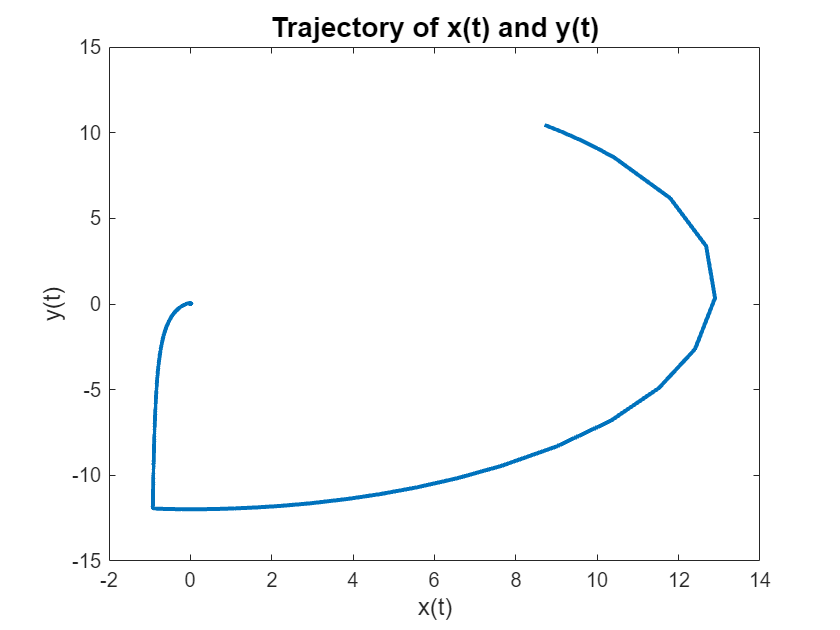

x0 = -18.0236
y0 = 0.1458


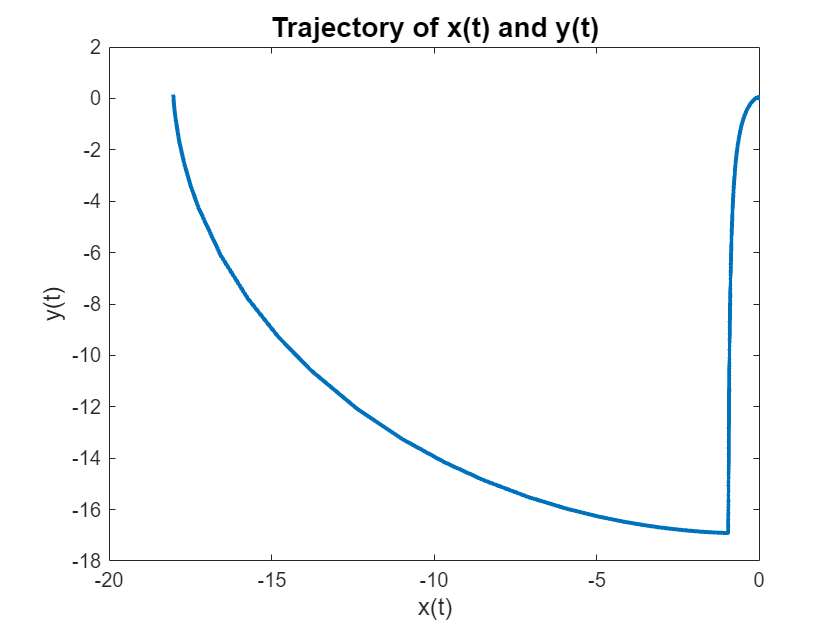

x0 = 10.1998
y0 = 9.2398


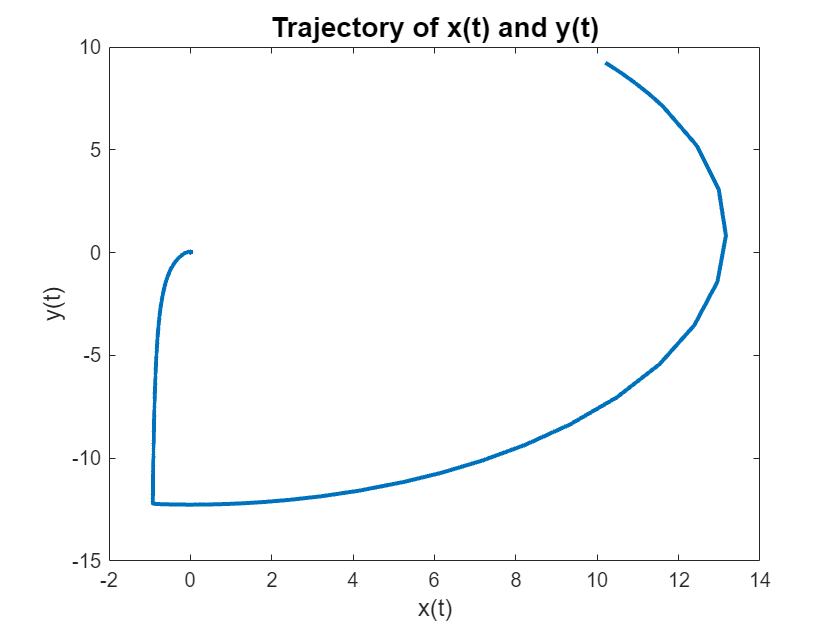

x0 = -1.0648
y0 = 4.9072


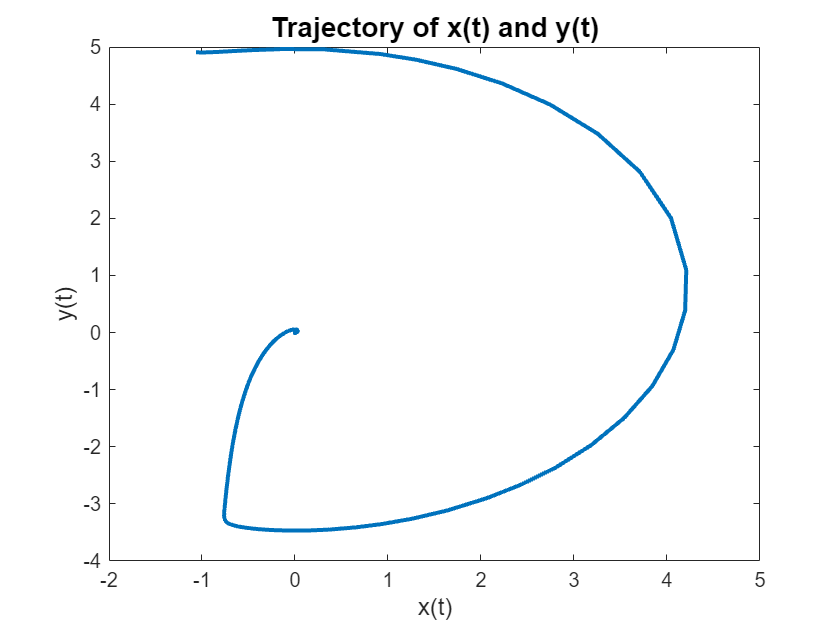

x0 = -1.4257
y0 = 15.7164


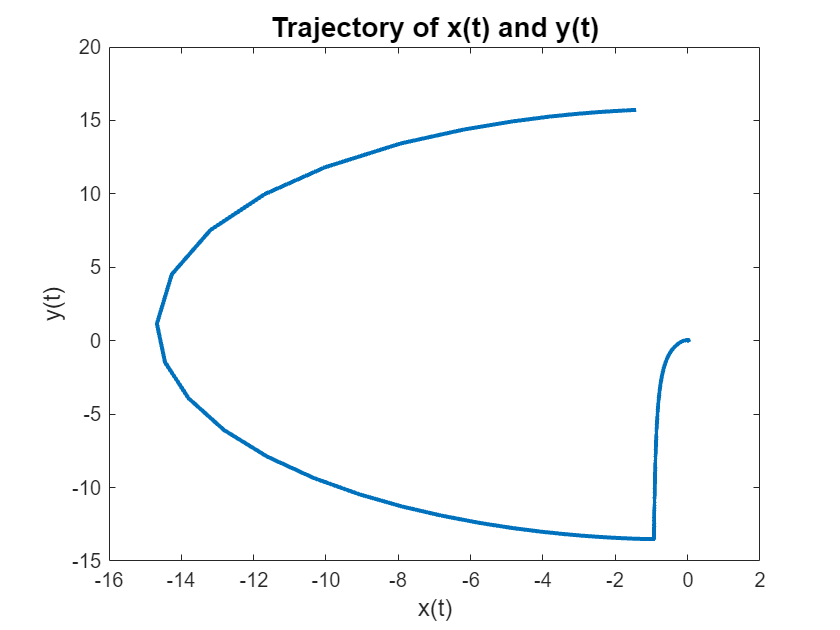

x0 = -0.8406
y0 = 0.9863


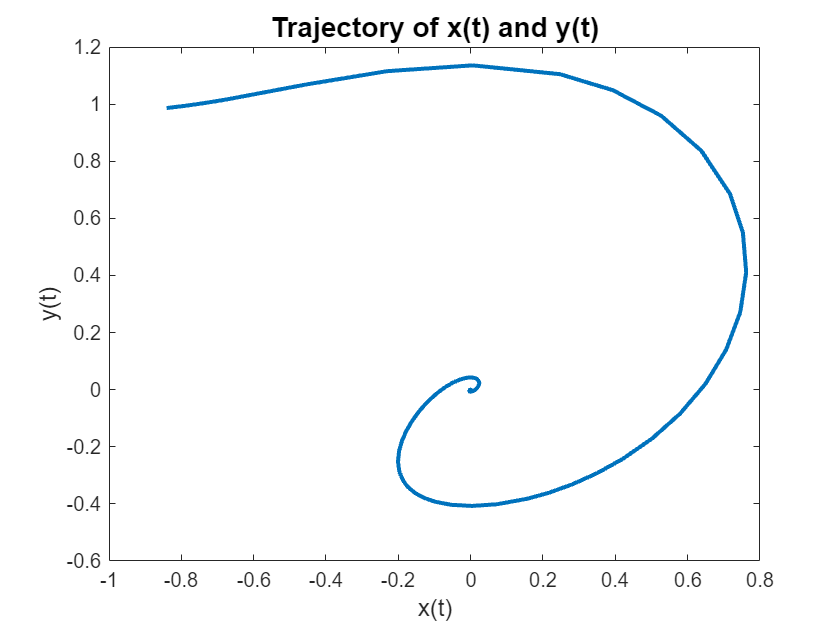

x0 = 7.6630
y0 = 0.2453


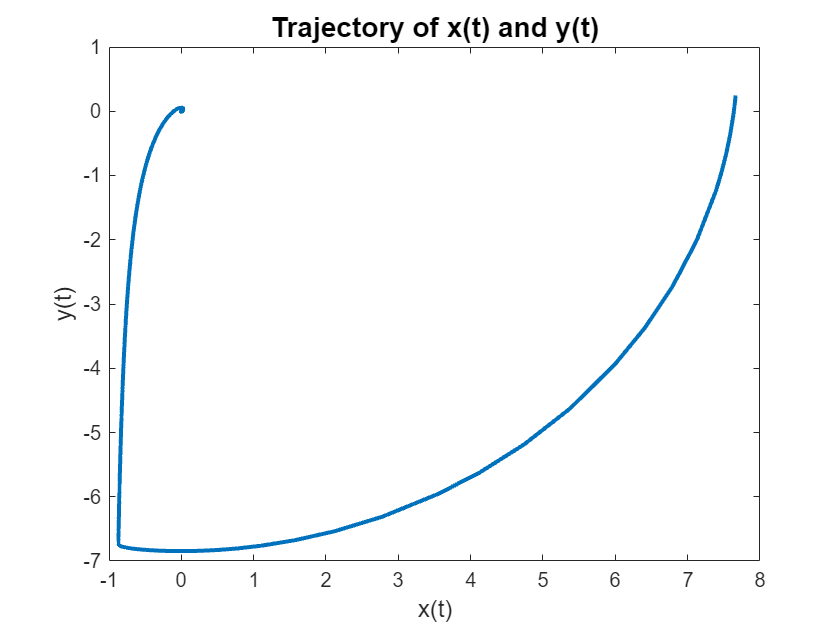

x0 = -5.6210
y0 = -3.0117


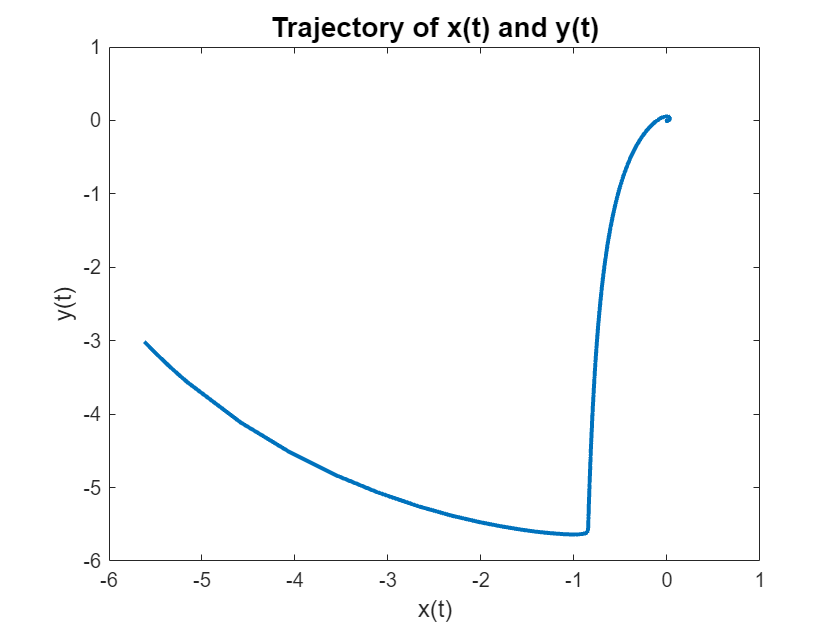

x0 = -11.6214
y0 = 6.4436


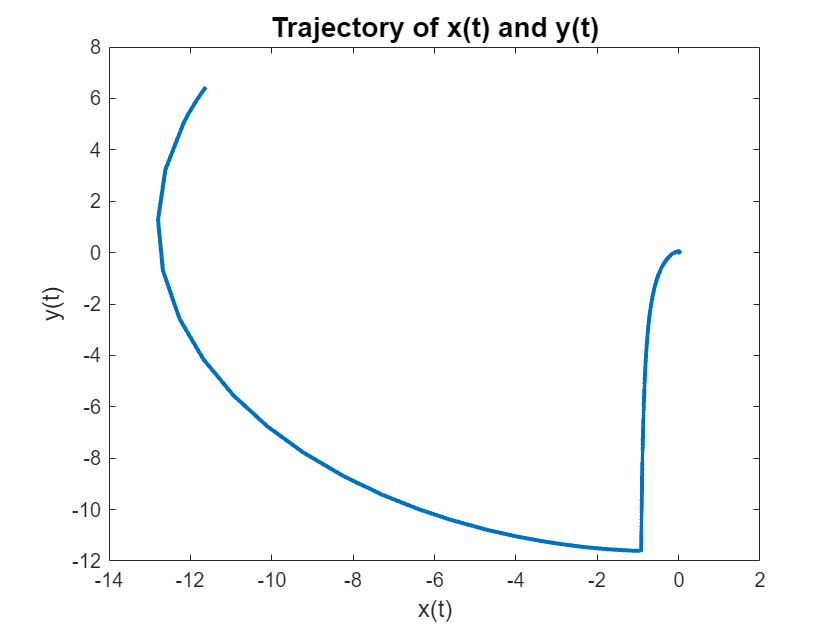

x0 = -9.9385
y0 = -4.0261


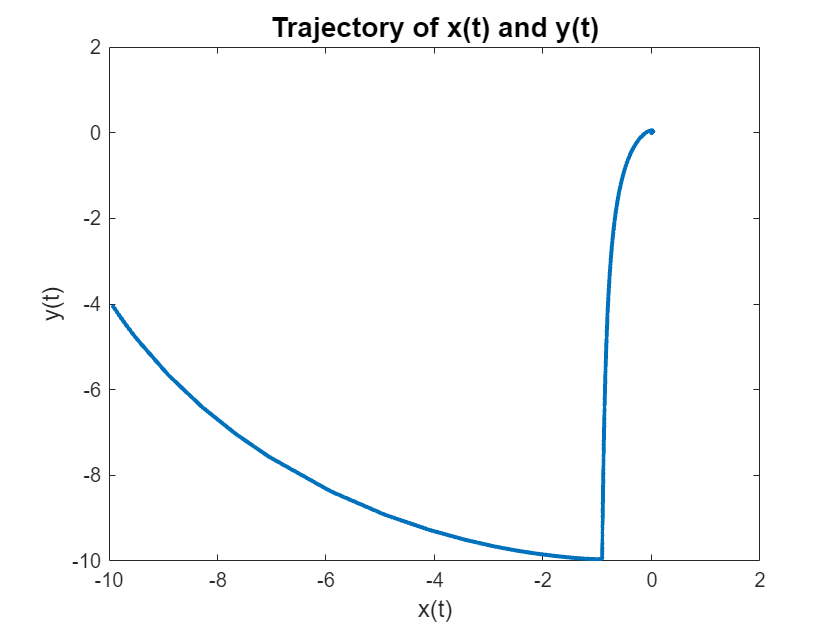

In [2]:
for i = 1:10
    x0 = 10*randn(1)
    y0 = 10*randn(1)
    plot_traj(x0,y0)
end

In [3]:
% define variables
x = sdpvar(1); y = sdpvar(1);
ops = sdpsettings('solver', 'SCS','verbose',0);
% Constructing the state space equation
f = [-x + (1+x)*y; -(1+x)*x];

% Step 1: Construct a Lyapunov candidate
degree = 4;
[V,Vc,mbasis] = polynomial([x;y],degree,1);

% Step 2: SOS constraint
epsilon =1e-6;
Constraint = [sos(V - (x^2+y^2))];
Vdot = -(jacobian(V,x)*f(1)+jacobian(V,y)*f(2)) - epsilon*(x^2+y^2);
Constraint = [Constraint, sos(Vdot)];

% Step 3: solve the sos program
solvesos(Constraint,[],ops,[Vc]);
Vcoef = value(Vc); % the coefficient of the Lyapunov function
disp('The Lyapunov coefficients:');

The Lyapunov coefficients:

In [4]:
disp(Vcoef);

   -0.0000
    0.0000
1.5291
   -0.3012
1.5523
   -0.0345
    0.0643
   -0.0000
    0.0217
    0.0633
    0.0000
    0.1266
   -0.0000
    0.0633

# Copositive optimization using SOS

$$
\begin{aligned}
\text{minimize} \quad & \gamma \\
\text{subject to} \quad & (x^2)^T(Z+\gamma I_n)(x^2) \in SOS\\
\end{aligned}
$$

In [5]:
%clear all

load("copositive.mat")
for i = 1:length(copositive)

Z_mat = copositive{i};
[n, n] = size(Z_mat);
tstart = tic;
%%%%Yalmip package with SeDuMi%%%%

%%%Define Variables%%%
gamma = sdpvar(1);
z = sdpvar(n,1);
z_sq = z.^2;
poly = z_sq.'*(Z_mat+gamma*eye(n,n))*z_sq;

%%%Define Objective function%%%
Objective = gamma;

%%%Define Constraints%%%
Constraints = [sos(poly)];

%%%Solve the optimization problem%%%
sol = solvesos(Constraints, Objective, ops,gamma);
tend(i) = toc(tstart);

%%%Yamip optimal value%%%
optimal(i) = value(Objective);

%%%Yalmip time and solver time%%%
yalmiptime(i) = sol.yalmiptime;
solvertime(i) = sol.solvertime;

disp(['Problem ',num2str(i)])
fprintf('Size of matrix: %d x %d\n', n,n);
disp(['Total Time: ', num2str(tend(i)), ' seconds']);   % Total time taken for the optimization process
disp(['Solver Time: ', num2str(solvertime(i)), ' seconds']);  % Time spent by the solver
disp(['YALMIP Time: ', num2str(yalmiptime(i)), ' seconds']);  % Time spent by YALMIP
fprintf('Optimal Value:% 0.4f', optimal(i));  % The optimal value of gamma
fprintf('Solver status: % s', sol.info);  % The optimal value of gamma
fprintf(' ');
end

Problem 1
Size of matrix: 8 x 8
Total Time: 2.2852 seconds
Solver Time: 0.0018076 seconds
YALMIP Time: 2.0952 seconds
Optimal Value: 17.3464
Solver status: Successfully solved (scs-direct)
 
Problem 2
Size of matrix: 14 x 14
Total Time: 6.4346 seconds
Solver Time: 0.0090184 seconds
YALMIP Time: 6.241 seconds
Optimal Value: 18.0011
Solver status: Successfully solved (scs-direct)
 
Problem 3
Size of matrix: 20 x 20
Total Time: 3.8924 seconds
Solver Time: 1.3233 seconds
YALMIP Time: 2.3937 seconds
Optimal Value: 22.0438
Solver status: Successfully solved (scs-direct)
 
Problem 4
Size of matrix: 26 x 26
Total Time: 13.4629 seconds
Solver Time: 1.9301 seconds
YALMIP Time: 11.3439 seconds
Optimal Value: 20.0601
Solver status: Successfully solved (scs-direct)
 
Problem 5
Size of matrix: 32 x 32
Total Time: 82.1083 seconds
Solver Time: 4.3154 seconds
YALMIP Time: 77.5566 seconds
Optimal Value: 24.6717
Solver status: Successfully solved (scs-direct)

# Moment curve and convex hull

Moment curve in $\mathbb{R}^{d+1}$ is given by $T = (1,t,t^2,t^3,\ldots,t^d)$

The convex hull $conv(T)$ is defined by 
$$
y_0 = 1,
\quad
\begin{bmatrix}
y_0 & y_1 \\
y_1 & y_2
\end{bmatrix} \succeq 0,
\quad
\begin{bmatrix}
y_1 & y_2 \\
y_2 & y_3
\end{bmatrix} \succeq 0
$$




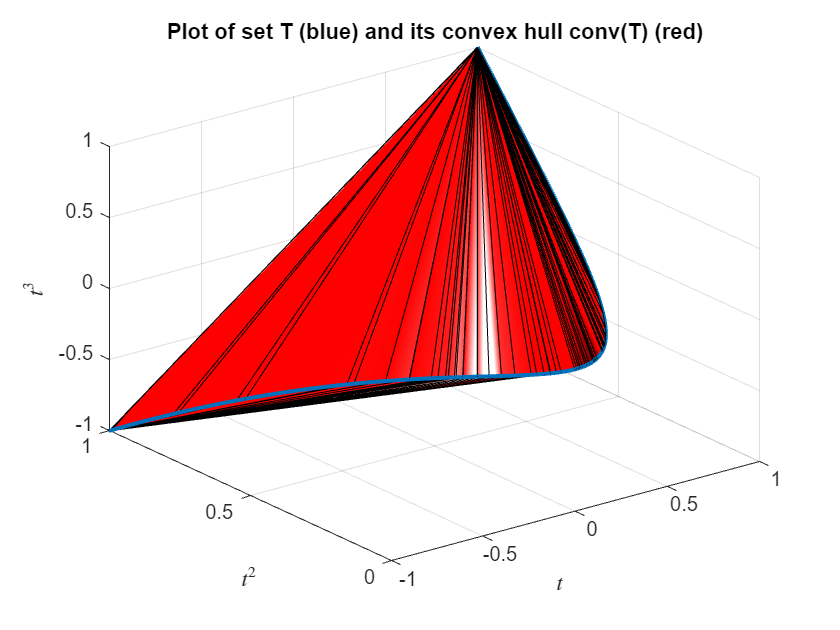

In [6]:
t = -1:0.01:1;
plot3(t,t.^2,t.^3,'LineWidth',2)
title('Plot of set T (blue) and its convex hull conv(T) (red)')
xlabel(' $t$ ', 'Interpreter', 'latex')
ylabel(' $t^2$ ', 'Interpreter', 'latex')
zlabel(' $t^3$ ', 'Interpreter', 'latex')
grid
y = sdpvar(3,1);
%%%Define Constraints%%%
Constraints = [[1 y(1);y(1) y(2)]+[y(1) y(2);y(2) y(3)]>=0;
[1 y(1);y(1) y(2)]-[y(1) y(2);y(2) y(3)]>=0];
plot(Constraints)